# Classification and Association Rule Mining Iris Data

## Modules

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import random

## Utility Functions

In [2]:
def split_data(X, y, test_size=0.2, random_state=42):
    """
    Splits the data into training and test sets (default 80/20 split).

    Parameters:
    - X: Features (independent variables)
    - y: Target (dependent variable)
    - test_size: Proportion of the dataset to include in the test split (default is 0.2)
    - random_state: Seed for random number generator (default is 42 for reproducibility)

    Returns:
    - X_train, X_test, y_train, y_test: Split datasets
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [3]:
def generate_transactions():
    random.seed(123)
    items_pool = ['milk', 'bread', 'beer', 'diapers', 'eggs', 'butter', 'cheese', 'yogurt', 'juice', 'cereal',
              'chocolate', 'coffee', 'tea', 'apples', 'bananas', 'grapes', 'oranges', 'chips', 'soda', 'cookies']

    transactions = []
    for _ in range(20):  # 20–50 transactions
        basket = random.choices(items_pool, k=random.randint(3, 8))
        transactions.append(list(set(basket)))  # remove duplicates

    return transactions

## Classification

### Data Loading

In [4]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [5]:
iris_df['species'] = iris.target

species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
iris_df['species'] = iris_df['species'].map(species_mapping)

label_encoder = LabelEncoder()
iris_df['species_encoded'] = label_encoder.fit_transform(iris_df['species'])

In [6]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


### Data Preprocessing

In [7]:
scaler = MinMaxScaler()

iris_scaled = iris_df.copy()
iris_scaled[iris.feature_names] = scaler.fit_transform(iris_scaled[iris.feature_names])

In [8]:
iris_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_encoded
0,0.222222,0.625000,0.067797,0.041667,setosa,0
1,0.166667,0.416667,0.067797,0.041667,setosa,0
2,0.111111,0.500000,0.050847,0.041667,setosa,0
3,0.083333,0.458333,0.084746,0.041667,setosa,0
4,0.194444,0.666667,0.067797,0.041667,setosa,0


### Data Encoding and Splitting

In [9]:
X = iris_scaled[iris.feature_names]
y = iris_scaled['species_encoded']

In [10]:
X_train, X_test, y_train, y_test = split_data(X, y)

### Data Classification

#### Decision Tree Classifier

##### Model Training

In [11]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

##### Metrics Computation

In [12]:
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='weighted')
rec_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

##### Display Model Metrics

In [13]:
print("Decision Tree Classifier")
print(f"Accuracy:  {acc_dt:.4f}")
print(f"Precision: {prec_dt:.4f}")
print(f"Recall:    {rec_dt:.4f}")
print(f"F1-score:  {f1_dt:.4f}")

Decision Tree Classifier
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000


In [14]:
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



##### Visualisation

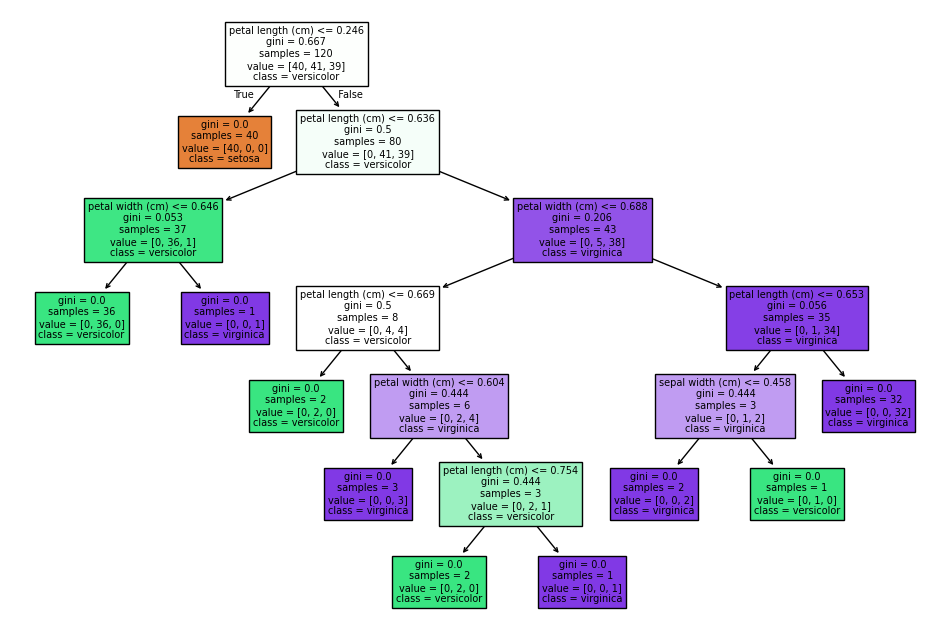

In [15]:
plt.figure(figsize=(12, 8))
plot_tree(dt_model, feature_names=iris.feature_names, class_names=label_encoder.classes_, filled=True)
plt.savefig("decision_tree_iris.png", dpi=300)
plt.show()

#### KNN with k=5

##### Model Training

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

##### Metrics Computation

In [17]:
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn, average='weighted')
rec_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

##### Display Model Metrics

In [18]:
print("KNN Classifier (k=5)")
print(f"Accuracy:  {acc_knn:.4f}")
print(f"Precision: {prec_knn:.4f}")
print(f"Recall:    {rec_knn:.4f}")
print(f"F1-score:  {f1_knn:.4f}")
print("\nClassification Report:")

KNN Classifier (k=5)
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-score:  1.0000

Classification Report:


In [19]:
print(classification_report(y_test, y_pred_knn, target_names=label_encoder.classes_))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Decision Tree vs KNN with k=5

In [20]:
if acc_dt > acc_knn:
    print("Decision Tree performed better — it can model exact class boundaries in the Iris dataset.")
elif acc_knn > acc_dt:
    print("KNN performed better — the scaled features improved distance-based classification.")
else:
    print("Both models performed equally well.")

Both models performed equally well.


Both the Decision Tree Classifier and the K-Nearest Neighbours (KNN, $k=5$) models achieved perfect accuracy on the Iris dataset. This outcome reflects the dataset’s high degree of feature separability, particularly in petal measurements, which serve as strong predictors of species. The relatively small size and balanced nature of the dataset, combined with its lack of noise, create ideal conditions for these algorithms to perform optimally. Decision Trees excel at learning clear, rule-based splits from well-structured data, while KNN benefits from the tight clustering of samples within species. While perfect scores demonstrate the models’ ability to capture the dataset’s underlying structure, they also highlight a limitation: performance on real-world, noisier datasets may not be as high. Therefore, such results should be interpreted as a benchmark of algorithm capability under ideal conditions rather than an expectation for more complex applications.

## Association Rule Mining

### Configuration

In [21]:
random.seed(123)

### Synthetic Data Generation

In [22]:
transactions = generate_transactions()

### One-Hot Encoding

In [23]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_transactions = pd.DataFrame(te_array, columns=te.columns_)

### Apriori Algorithm

#### Compute Rules

In [24]:
frequent_itemsets = apriori(df_transactions, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

#### Display Top 5 Rules

In [25]:
rules_sorted = rules.sort_values(by='lift', ascending=False).head(5)
print("Top 5 Association Rules by Lift:")
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Top 5 Association Rules by Lift:
   antecedents  consequents  support  confidence      lift
0  (chocolate)       (milk)      0.2    0.666667  3.333333
1       (milk)  (chocolate)      0.2    1.000000  3.333333
2  (chocolate)        (tea)      0.2    0.666667  1.904762
3        (tea)  (chocolate)      0.2    0.571429  1.904762


The association rules derived from the synthetic dataset (`seed = 123`) show a strong relationship between the purchase of *chocolate* and *milk*. The first rule — “chocolate → milk” — has a **support** of 0.2, meaning that 20% of all transactions contain both chocolate and milk. Its **confidence** is approximately 0.67, indicating that when chocolate is purchased, milk is also purchased about two-thirds of the time. The **lift** of 3.33 means that the likelihood of buying milk increases by more than three times when chocolate is purchased, compared to milk’s baseline purchase rate.

The second rule — “milk → chocolate” — also has 20% **support** but with 100% **confidence**, meaning that in this dataset, every transaction containing milk also contains chocolate. The **lift** remains 3.33, reinforcing the strong positive association.

While these patterns suggest a close link between the two products, it’s important to note that the data here is *synthetic*, so the relationships may not reflect real-world consumer behaviour. In practice, such rules could be used for **cross-promotions** (e.g., bundling chocolate and milk), targeted marketing, or store layout optimisation to increase sales of related items.